Demonstrate that the deflection is  theta_A=P*a*b*(L+b)/(6*E*I*L)

In [1]:
import sympy as sp
from sympy import init_printing, simplify, pprint

# Define symbols
R_A, M_A, R_B, M_B = sp.symbols('R_A M_A R_B M_B', real=True)

# needed for the continuity equations
x, L, a, b, P, E, I = sp.symbols('x L a b P E I', positive=True)


In [2]:
# Define additional constants for calculations
C1, C2 = sp.symbols('C1 C2')

# Create constraint that enforces a <= L
# constraint = sp.Eq(b, L - a)

# You can now use this constraint in your calculations
# For verification, we can check if this implies a <= L
#result = sp.solve(constraint, a)[0]  # a = L - b
# print("From b > 0 and b = L - a, we get:", result)
# print("Since b > 0, this implies a <= L")

# Reaction at A for point load at a
#R_A = P * (L-a) / L

# Moment function for 0 <= x < a
M1 = R_A * x - M_A


In [3]:
eqn_force= R_A + R_B - P
# R_B_soln=sp.solve(eqn_force, R_B)[0]
# print(R_B_soln)

eqn_moment= M_A - P * a + M_B + L * R_B

# M_B_soln=sp.solve(eqn_moment, M_B)[0]
# print(M_B_soln)

In [5]:
# # Piecewise polynomials are useful for interpolating functions with multiple segments
# import numpy as np
# from scipy.interpolate import PPoly
# import sympy as sp
#
# # Coefficients for M1: R_A * x
# M1_coeffs = [float(R_A), 0.0]  # degree 1: [slope, intercept]
#
# # Coefficients for M2: R_A * x - P * (x - a) = (R_A - P) * x + P * a
# M2_coeffs = [float(R_A - P), float(P * a)]
#
# # Define breakpoints
# breaks = [0.0, float(a), float(L)]
#
# # Arrange coefficients for PPoly: shape (deg+1, n_intervals)
# # Each column is for an interval: [0, a), [a, L]
# c = np.array([
# 	[M1_coeffs[0], M2_coeffs[0]],
# 	[M1_coeffs[1], M2_coeffs[1]]
# ])
#
# # Create the piecewise polynomial
# moment_ppoly = PPoly(c, breaks)
#
# # Debug: print the polynomial for each interval
# print("Piecewise polynomial coefficients (per interval):")
# print(moment_ppoly.c)
# print("Breakpoints:", moment_ppoly.x)

In [4]:
# Integrate EI v'' = M(x) to get slope
C1, C2 = sp.symbols('C1 C2')
# For 0 <= x < a
v1_prime = sp.integrate(M1, x) / (E * I) + C1
v1_prime


C1 + (-M_A*x + R_A*x**2/2)/(E*I)

In [5]:
C1_soln=sp.solve(v1_prime.subs(x,0), C1)[0]
print(C1_soln)

v1_prime=v1_prime.subs(C1,C1_soln)
v1_prime

0


(-M_A*x + R_A*x**2/2)/(E*I)

In [6]:
# Integrate again to get deflection

v1 = sp.integrate(v1_prime, x) + C2
v1

C2 - M_A*x**2/(2*E*I) + R_A*x**3/(6*E*I)

In [7]:
C2_soln=sp.solve(v1.subs(x,0), C2)[0]
C2_soln

0

In [8]:
v1 = v1.subs(C2,C2_soln)  # Corrected to properly substitute C2_soln
v1

-M_A*x**2/(2*E*I) + R_A*x**3/(6*E*I)

 For a <= x <= L

In [9]:
# Moment function for a <= x <= L
M2 = R_A * x  - M_A - P * (x - a)
#M2 = M2.subs({R_B: R_B_soln, M_B: M_B_soln}).together()
#M2 = R_B * (L - x) + M_B
#?sp.polys
#?sp.polys.together

print(M1)
print(M2)

-M_A + R_A*x
-M_A - P*(-a + x) + R_A*x


In [41]:
M2=M2.subs(M_A,-M_B-R_B*L+P*a).subs(R_A, P-R_B).simplify()
M2

L*R_B + M_B - R_B*x

In [42]:

M2.collect(L-x)

L*R_B + M_B - R_B*x

In [ ]:
# For a <= x <= L
C3, C4 = sp.symbols('C3 C4')  # Update symbols for integration constants
v2_prime = sp.integrate(M2, x) / (E * I) + C3
print(v1_prime)
print(v2_prime)

In [ ]:
# C3_soln=sp.solve(v2_prime.subs(x,L), C3)[0]
C3_soln=sp.solve(v2_prime.subs(x,a)-v1_prime.subs(x,a), C3)[0]
print(C3_soln)

In [12]:

v2_prime=v2_prime.subs(C3,C3_soln)
print(v2_prime)

-P*a**2/(2*E*I)
-P*a**2/(2*E*I) + (x**2*(-P/2 + R_A/2) + x*(-M_A + P*a))/(E*I)


In [ ]:
v2 = sp.integrate(v2_prime, x) + C4  # Use C4 instead of sp.symbols('C4')
v2

In [ ]:

print(simplify(v2.subs(x,a)-v1.subs(x,a)))
C4_soln=sp.solve(v2.subs(x,a)-v1.subs(x,a), C4)[0]
C4_soln

In [13]:

v2=v2.subs(C4,C4_soln)
v2

C4 - P*a**2*x/(2*E*I) + x**3*(-P + R_A)/(6*E*I) + x**2*(-M_A + P*a)/(2*E*I)
C4 - P*a**3/(6*E*I)
P*a**3/(6*E*I)
P*a**3/(6*E*I) - P*a**2*x/(2*E*I) + x**3*(-P + R_A)/(6*E*I) + x**2*(-M_A + P*a)/(2*E*I)


In [14]:
# Apply boundary conditions:
# v(0) = 0
# v(L) = 0
# v1(a) == v2(a) (continuity)
# v1_prime.subs(x=a) == v2_prime.subs(x=a) (slope continuity)

# # Substitute integration constants
# v1_prime = v1_prime.subs('C1', C1)
# v2_prime = v2_prime.subs('C2', C2)
# v1 = v1.subs('C3', C3)
# v2 = v2.subs('C4', C4)

# Set up equations
eqs = [
	# v1.subs(x, 0),  # v(0) = 0
	eqn_force,
	eqn_moment,
	v2.subs(x, L),  # v(L) = 0
	v2_prime.subs(x, L),  # v'(L) = 0
	# sp.simplify(v1.subs(x, a) - v2.subs(x, a)),  # continuity at x=a
	# sp.simplify(v1_prime.subs(x, a) - v2_prime.subs(x, a)),  # slope continuity at x=a
	# a+b-L
]
print(eqs)

[-P + R_A + R_B, L*R_B + M_A + M_B - P*a, L**3*(-P + R_A)/(6*E*I) + L**2*(-M_A + P*a)/(2*E*I) - L*P*a**2/(2*E*I) + P*a**3/(6*E*I), -P*a**2/(2*E*I) + (L**2*(-P/2 + R_A/2) + L*(-M_A + P*a))/(E*I)]


In [15]:
# Solve for constants
#?sp.solve
sol = sp.solve(eqs, (R_A, M_A, R_B, M_B), dict=True)[0]
print(sol)
sol = sp.factor(sol)
sol=sol.subs(-L+a,b)
sol

{M_A: (L**2*P*a - 2*L*P*a**2 + P*a**3)/L**2, M_B: (-L*P*a**2 + P*a**3)/L**2, R_A: (L**3*P - 3*L*P*a**2 + 2*P*a**3)/L**3, R_B: (3*L*P*a**2 - 2*P*a**3)/L**3}


{M_A: P*a*b**2/L**2, M_B: P*a**2*b/L**2, R_A: P*b**2*(L + 2*a)/L**3, R_B: -P*a**2*(-3*L + 2*a)/L**3}

In [28]:
# Substitute integration constants
v1_prime = v1_prime.subs(sol)

#sp.pprint(v1_prime)
#v1_prime = v1_prime.simplify().factor()
v1_prime

P*b**2*x*(-2*L*a + L*x + 2*a*x)/(2*E*I*L**3)

In [17]:
v2_prime = v2_prime.subs(sol).factor()
v2_prime

P*(-L**3*a**2 + 2*L**3*a*x - L**3*x**2 - 2*L*a*b**2*x + L*b**2*x**2 + 2*a*b**2*x**2)/(2*E*I*L**3)

In [18]:

v1 = v1.subs(sol)
v2 = v2.subs(sol)

In [27]:
v2 = v2.subs(sol).simplify().together()  # Update to store the result in v2
v2 = sp.collect(v2, x)
v2  # Print v2 after collection


P*(L**3*a**2*(a - 3*x) + 3*L*a*x**2*(L**2 - b**2) + x**3*(-L**3 + b**2*(L + 2*a)))/(6*E*I*L**3)

In [20]:
v2=v2.subs(sol).simplify().together()  # Update to store the result in v2
v2.factor(deep=True)  # Print v2 after substitution

P*(L**3*a**3 - 3*L**3*a**2*x + 3*L**3*a*x**2 - L**3*x**3 - 3*L*a*b**2*x**2 + L*b**2*x**3 + 2*a*b**2*x**3)/(6*E*I*L**3)


In [21]:
# Slope at left end (x=0)
theta_A = v1_prime.subs(C1, sol[C1]).subs(x, 0)
print(theta_A)
# Simplify and substitute R_A and b
theta_A = sp.simplify(theta_A).factor()
print(theta_A)

KeyError: C1

In [31]:
# Display result
print("θ_A (slope at left end) =")
sp.pprint(theta_A)
print("\nCompare to formula: P*a*b*(L+b)/(6*E*I*L)")

# Check equality
theta_A_formula = -(P*a*b*(L+b)/(6*E*I*L)).subs(b, L-a)
print("Proof correct:", sp.simplify(theta_A - theta_A_formula) == 0)

θ_A (slope at left end) =
-P⋅a⋅(-2⋅L + a)⋅(-L + a) 
─────────────────────────
         6⋅E⋅I⋅L         

Compare to formula: P*a*b*(L+b)/(6*E*I*L)
Proof correct: True


In [ ]:
# Symbolic piecewise polynomial

M_piecewise = sp.Piecewise(
	(M1, x < a),
	(M2, x >= a)
)

# Display the piecewise function
print("Symbolic piecewise moment function:")
sp.pprint(M_piecewise)

# Simplify the expression
M_simplified = sp.simplify(M_piecewise)
print("\nSimplified form:")
sp.pprint(M_simplified)

# Example: Calculate the moment at specific points
print("\nMoment at x=0:", M_piecewise.subs(x, 0))

print("Moment at x=a:", M_piecewise.subs(x, a))

# First, substitute x=L
moment_at_L = M_piecewise.subs(x, L)
print("Moment at x=L:", moment_at_L)

# Then apply the assumption a <= L using the constraint b = L-a with b > 0
#moment_at_L_simplified = moment_at_L.subs(b, L-a).simplify()

print("Moment at x=L (before assumptions):", moment_at_L)
# print("Moment at x=L (with a <= L assumption):", moment_at_L_simplified)

## Creating a Piecewise Slope Function

We'll now create a piecewise function combining v1_prime and v2_prime, and visualize it with sample values.


In [181]:
# Create a piecewise function for the slope
v_prime_piecewise = sp.Piecewise(
	(v1_prime, x < a),
	(v2_prime, x >= a)
)

# Display the piecewise function
print("Symbolic piecewise slope function:")
sp.pprint(v_prime_piecewise)


Symbolic piecewise slope function:
⎧                     2                                                      
⎪                  P⋅b ⋅x⋅(-2⋅L⋅a + L⋅x + 2⋅a⋅x)                             
⎪                  ─────────────────────────────                    for a > x
⎪                                   3                                        
⎪                            2⋅E⋅I⋅L                                         
⎨                                                                            
⎪  ⎛   3  2      3        3  2          2        2  2        2  2⎞           
⎪P⋅⎝- L ⋅a  + 2⋅L ⋅a⋅x - L ⋅x  - 2⋅L⋅a⋅b ⋅x + L⋅b ⋅x  + 2⋅a⋅b ⋅x ⎠           
⎪─────────────────────────────────────────────────────────────────  otherwise
⎪                                   3                                        
⎩                            2⋅E⋅I⋅L                                         


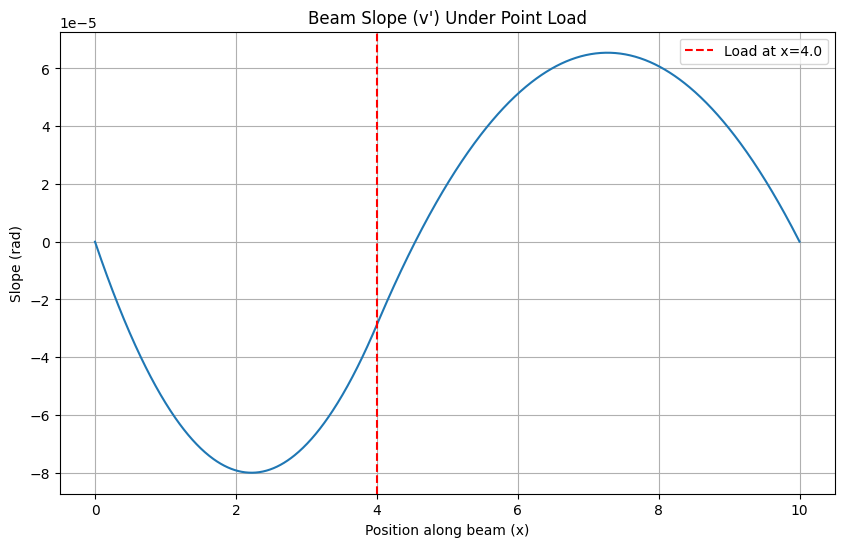

In [182]:
# Define sample values for the constants
L_val = 10.0  # Length of beam (m)
a_val = 4.0   # Position of point load (m)
b_val = L_val - a_val  # Distance from load to right end (m)
P_val = 1000.0  # Magnitude of point load (N)
E_val = 2e11   # Young's modulus (Pa) - typical for steel
I_val = 1e-4   # Moment of inertia (m^4)

# Substitute the values
v_prime_numeric = v_prime_piecewise.subs({
	L: L_val,
	a: a_val,
	b: b_val,
	P: P_val,
	E: E_val,
	I: I_val
})

# Create a numerical function for plotting
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify

v_prime_func = lambdify(x, v_prime_numeric, "numpy")

# Create x values for plotting
x_vals = np.linspace(0, L_val, 1000)
y_vals = v_prime_func(x_vals)

# Plot the slope
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals)
plt.axvline(x=a_val, color='r', linestyle='--', label=f'Load at x={a_val}')
plt.title('Beam Slope (v\') Under Point Load')
plt.xlabel('Position along beam (x)')
plt.ylabel('Slope (rad)')
plt.grid(True)
plt.legend()
plt.show()


## Creating a Piecewise Deflection Function

Now we'll visualize the deflection (v) along the beam.


In [ ]:
# Create a piecewise function for the deflection
v_piecewise = sp.Piecewise(
	(v1, x < a),
	(v2, x >= a)
)

# Display the piecewise function
print("Symbolic piecewise deflection function:")
sp.pprint(v_piecewise)

# Substitute values
v_numeric = v_piecewise.subs({
	L: L_val,
	a: a_val,
	b: b_val,
	P: P_val,
	E: E_val,
	I: I_val
})

# Create a numerical function for plotting
v_func = lambdify(x, v_numeric, "numpy")

# Plot the deflection
plt.figure(figsize=(10, 6))
plt.plot(x_vals, v_func(x_vals))
plt.axvline(x=a_val, color='r', linestyle='--', label=f'Load at x={a_val}')
plt.title('Beam Deflection (v) Under Point Load')
plt.xlabel('Position along beam (x)')
plt.ylabel('Deflection (m)')
plt.grid(True)
plt.legend()
plt.show()


## Demonstration of Fixed-End Shears

For a beam with fixed ends and a point load P at distance a from the left end:

$$ V_{FA} = \frac{Pb^2}{L^3}(3a+b) $$
$$ V_{FB} = \frac{Pa^2}{L^3}(a+3b) $$

Let's verify these formulas through our symbolic analysis.


In [ ]:
# Fixed-End Shears formulas
V_FA_formula = P*b**2*(3*a+b)/L**3
V_FB_formula = P*a**2*(a+3*b)/L**3

# Display the formulas
print("Fixed-End Shear at A:")
sp.pprint(V_FA_formula)
print("\nFixed-End Shear at B:")
sp.pprint(V_FB_formula)

# Create piecewise function for the moment with fixed-end conditions
M_fixed_piecewise = sp.Piecewise(
	(R_A * x - M_A, x < a),
	(R_A * x - M_A - P * (x - a), x >= a)
)

# Create piecewise function for shear (derivative of moment)
V_fixed = sp.diff(M_fixed_piecewise, x)

print("\nShear Force Function (derivative of moment):")
sp.pprint(V_fixed)


In [ ]:
# Visualize the shear force and moment diagrams for fixed-end conditions
# First, substitute the values of R_A, M_A, etc. for fixed-end conditions

# For fixed ends: R_A = V_FA, R_B = V_FB, M_A and M_B are the fixed-end moments
fixed_vals = {
	R_A: V_FA_formula.subs({L: L_val, a: a_val, b: b_val, P: P_val}),
	M_A: -P_val*b_val**2*a_val/L_val**2,  # Fixed-end moment at A
	P: P_val,
	a: a_val
}

M_fixed_numeric = M_fixed_piecewise.subs(fixed_vals)
V_fixed_numeric = V_fixed.subs(fixed_vals)

# Create numerical functions for plotting
M_fixed_func = lambdify(x, M_fixed_numeric, "numpy")
V_fixed_func = lambdify(x, V_fixed_numeric, "numpy")

# Plot moment and shear
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.plot(x_vals, M_fixed_func(x_vals))
ax1.axvline(x=a_val, color='r', linestyle='--', label=f'Load at x={a_val}')
ax1.set_title('Fixed-End Bending Moment Diagram')
ax1.set_ylabel('Moment (N·m)')
ax1.grid(True)
ax1.legend()

ax2.plot(x_vals, V_fixed_func(x_vals))
ax2.axvline(x=a_val, color='r', linestyle='--', label=f'Load at x={a_val}')
ax2.set_title('Fixed-End Shear Force Diagram')
ax2.set_xlabel('Position along beam (x)')
ax2.set_ylabel('Shear Force (N)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Verify that the fixed-end shear at x=0 matches our formula
V_at_A = V_fixed_numeric.subs(x, 0)
print("Shear at A from our analysis:", V_at_A)
print("Shear at A from formula:", V_FA_formula.subs({L: L_val, a: a_val, b: b_val, P: P_val}))
print("Match:", sp.simplify(V_at_A - V_FA_formula.subs({L: L_val, a: a_val, b: b_val, P: P_val})) == 0)

# Verify that the fixed-end shear at x=L matches our formula
V_at_B = -V_fixed_numeric.subs(x, L_val)  # Negative because of sign convention
print("\nShear at B from our analysis:", V_at_B)
print("Shear at B from formula:", V_FB_formula.subs({L: L_val, a: a_val, b: b_val, P: P_val}))
print("Match:", sp.simplify(V_at_B - V_FB_formula.subs({L: L_val, a: a_val, b: b_val, P: P_val})) == 0)

